In [17]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
generator=torch.load(r"D:\GIT\anime-image-generation\generator_model_asta1.pth")

In [19]:
# Step 2: Generate Images
num_images =64  # Number of images to generate
noise_dim = 128  # Dimension of the noise vector
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [20]:
stats = (0.5,0.5,0.5),(0.5,0.5,0.5)
def denorm (img_tensors):
    return img_tensors*stats[1][0]+stats[0][0]

In [21]:
noise = torch.randn(num_images, noise_dim, 1, 1, device=device)
print(noise[0])

tensor([[[-0.8172]],

        [[-0.9551]],

        [[-0.2709]],

        [[-0.7877]],

        [[ 1.6927]],

        [[ 0.3267]],

        [[ 0.5082]],

        [[-0.5967]],

        [[-0.8574]],

        [[-0.4452]],

        [[ 1.1864]],

        [[ 1.5958]],

        [[-0.7386]],

        [[-1.1427]],

        [[-0.3953]],

        [[-1.6201]],

        [[ 0.1492]],

        [[-1.2941]],

        [[ 0.6449]],

        [[ 0.2240]],

        [[-0.6193]],

        [[-1.1621]],

        [[-0.8948]],

        [[ 1.0960]],

        [[-0.0831]],

        [[-0.0499]],

        [[ 0.4998]],

        [[-0.0419]],

        [[ 0.0209]],

        [[-0.6628]],

        [[-2.2998]],

        [[ 2.1439]],

        [[ 0.2381]],

        [[-0.0732]],

        [[ 1.2564]],

        [[-0.4173]],

        [[-0.4284]],

        [[-0.1987]],

        [[ 0.9922]],

        [[ 1.1201]],

        [[-0.3189]],

        [[ 0.1576]],

        [[ 0.8157]],

        [[-2.3789]],

        [[ 0.8296]],

        [[

In [22]:
with torch.no_grad():
    generated_images = generator(noise)
print(denorm(generated_images[0,0]))


tensor([[0.9959, 0.9954, 0.9876,  ..., 0.6528, 0.5905, 0.5515],
        [0.9988, 0.9980, 0.9962,  ..., 0.5751, 0.5416, 0.5982],
        [0.9987, 0.9988, 0.9916,  ..., 0.5763, 0.5691, 0.6655],
        ...,
        [0.6272, 0.5717, 0.5736,  ..., 0.1559, 0.2138, 0.2535],
        [0.5381, 0.5597, 0.5383,  ..., 0.2103, 0.2058, 0.2770],
        [0.5148, 0.5880, 0.5381,  ..., 0.1328, 0.1540, 0.2902]],
       device='cuda:0')


In [23]:
def show_images(images,nmax=64):
    images.cpu()
    fig,ax=plt.subplots(figsize=(8,8))
    ax.set_xticks([]);ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]),nrow=8).permute(1,2,0))

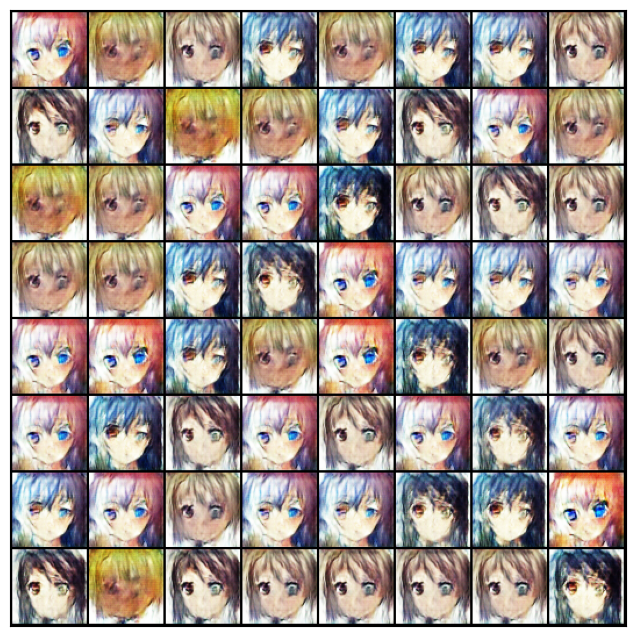

In [24]:
show_images(generated_images.cpu())